# Multi-Agent Systems 

When stepping into the world of multi-agent systems, it’s easy to get caught up in the complex web of orchestrating multiple agents right from the start. The secret, however, lies in building robust single-agent solutions first. These single agents are the foundational building blocks for scalability, security, and reliability in any agentic system.

### Why Start with Single Agents?

`Azure AI Agent Service` makes it straightforward to design agents that are solid, context-aware, and capable of achieving specific goals autonomously. Once these agents are successfully handling their tasks as singletons, you can gradually elevate them into more complex multi-agent architectures.

### The Power Duo (Framework): Semantic Kernel and AutoGen

- **AutoGen**:  
  Ideal for creativity and experimentation. It functions as a state-of-the-art research SDK, enabling you to test new ideas, experiment with collaboration patterns, and push the boundaries of agent capabilities.  

- **Semantic Kernel**:  
  Provides the enterprise-grade orchestration framework for seamless, non-breaking changes once you have validated your ideas. It’s designed for production-scale reliability and supports teams that need to move quickly without sacrificing stability.

### My opinionated Flow of Building Multi-Agent Architectures

1. **Start with Azure AI Agent Service**  
   Build single-agent solutions that are reliable and context-aware.

2. **Expand to Multi-Agent Orchestration**  
   Use AutoGen to explore, iterate, and discover the best collaboration patterns among agents.

3. **Move to Semantic Kernel**  
   Integrate proven ideas into Semantic Kernel for reliability, and enterprise support (`SK` is `MSFT` supported).

My Formula (and Mental Models)

**Multi-Agent Architecture** = Σ (Production Ready SingleAgent (Tools, Memory, Tracebility, Isolated Execution)) + Preferred Framework (Semantic Kernel, Autogen..)

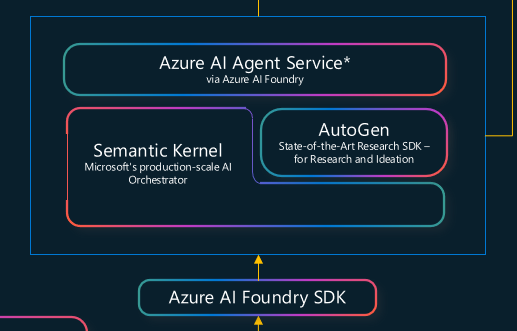


## Autogen (Framework) + Azure AI Agent Service (Managed Agents)

**Prerequisites**

1. Create an Azure Cosmos DB for MongoDB vCore resource (follow this quick start guide https://learn.microsoft.com/en-us/azure/cosmos-db/mongodb/vcore/quickstart-portal)
2. Azure AI foundry
3. Install libraries

In [7]:
#!pip install pymongo

**Initialize Project ai foundry**

In [1]:
# Import necessary libraries
import os
from azure.identity import DefaultAzureCredential
from azure.ai.projects import AIProjectClient
from utils.ml_logging import get_logger

logger = get_logger()

# Set your connection string (replace with your actual connection string)
project_connection_string = os.getenv("AZURE_AI_FOUNDRY_CONNECTION_STRING")

# Create the project client
project = AIProjectClient.from_connection_string(
    conn_str=project_connection_string,
    credential=DefaultAzureCredential()
)

# Verify connection
logger.info("AI Foundry project client created successfully")

2025-02-05 00:21:26,772 - micro - MainProcess - INFO     AI Foundry project client created successfully (3305489847.py:<module>:19)


**Retrieve an existent azure ai agent**

In [63]:
from tabulate import tabulate

def list_agents():
    """
    Extracts agent details along with the names of the tools,
    and prints the information as a table.
    """    
    #list the agents created
    agents = project.agents.list_agents()
     # Prepare table headers.
    table_headers = ["ID", "Name", "Model", "Created At", "Owner"]
    table_rows = []
    
    # Loop over each agent entry.
    for agent in agents.get("data", []):
        agent_id = agent.get("id", "N/A")
        name = agent.get("name", "N/A")
        model = agent.get("model", "N/A")
        created_at = agent.get("created_at", "N/A")
        owner = agent.get("metadata", {}).get("owner", "N/A")
        table_rows.append([agent_id, name, model, created_at, owner])
    
    # Print the table using tabulate.
    print(tabulate(table_rows, headers=table_headers, tablefmt="grid"))

In [64]:
list_agents()

2025-02-05 00:57:10,239 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/assistants?api-version=REDACTED'
Request method: 'GET'
Request headers:
    'Accept': 'application/json'
    'x-ms-client-request-id': '6ba18cbb-e38e-11ef-8207-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
No body was attached to the request
2025-02-05 00:57:11,690 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 06:57:10 GMT'
    'Content-Type': 'application/json'
    'Transfer-Encoding': 'chunked'
    'Connection': 'keep-alive'
    'Vary': 'REDACTED'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 'REDACTED'
    'openai-organi

+-------------------------------+---------------------------+---------+--------------+-------------+
| ID                            | Name                      | Model   |   Created At | Owner       |
+===============================+===========================+=========+==============+=============+
| asst_rRzcNWtpJ4nyP6xmcSvri2Y0 | evaluator-retreiver-agent | gpt-4o  |   1738737952 | ai_coe_team |
+-------------------------------+---------------------------+---------+--------------+-------------+
| asst_3lRr1y9qw3MnlARkmmAXOVZO | mongodb-retreiver-agent   | gpt-4o  |   1738737173 | ai_coe_team |
+-------------------------------+---------------------------+---------+--------------+-------------+
| asst_75cafvsYsBPEmoiDge01AACU | mongodb-retreiver-agent   | gpt-4o  |   1738737121 | ai_coe_team |
+-------------------------------+---------------------------+---------+--------------+-------------+
| asst_xQDhh3FIKSrZLZrJm04bzDq5 | mongodb-retreiver-agent   | gpt-4o  |   1738737116 | ai_c

In [65]:
agent = project.agents.get_agent(assistant_id="asst_75cafvsYsBPEmoiDge01AACU")

2025-02-05 00:57:14,756 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/assistants/asst_75cafvsYsBPEmoiDge01AACU?api-version=REDACTED'
Request method: 'GET'
Request headers:
    'Accept': 'application/json'
    'x-ms-client-request-id': '6e52df0b-e38e-11ef-8ea9-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
No body was attached to the request
2025-02-05 00:57:15,879 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 06:57:15 GMT'
    'Content-Type': 'application/json'
    'Transfer-Encoding': 'chunked'
    'Connection': 'keep-alive'
    'Vary': 'REDACTED'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version':

**Create Single Agent**

In [28]:
import os
import json
import logging
from typing import Optional, List, Dict, Any
from azure.core.exceptions import HttpResponseError

def create_azure_ai_agent(
    project,
    deployment_name: Optional[str] = None,
    name: str = "my-basic-agent",
    description: str = "Basic agent for technology support",
    instructions: str = "You are a friendly assistant who loves answering technology questions.",
    tools: Optional[List[Any]] = None,
    tool_resources: Optional[Any] = None,
    toolset: Optional[Any] = None,
    temperature: Optional[float] = None,
    top_p: Optional[float] = None,
    response_format: Optional[Any] = None,
    metadata: Optional[Dict[str, str]] = None,
    content_type: str = 'application/json',
    **kwargs: Any
):
    """
    Creates a basic AI agent using the provided project instance and extended parameters.
    
    Signature details for project.agents.create_agent:
      - model: str, the deployment model name (if not provided, it is retrieved from an environment variable)
      - name: Optional[str], the agent's name
      - description: Optional[str], a brief description of the agent
      - instructions: Optional[str], specific instructions that define the agent's behavior
      - tools: Optional[List[ToolDefinition]], tool definitions available to the agent
      - tool_resources: Optional[ToolResources], configuration for tool resources
      - toolset: Optional[ToolSet], a collection of tools available for the agent
      - temperature: Optional[float], controls the creativity of the agent's responses
      - top_p: Optional[float], controls the nucleus sampling for generating responses
      - response_format: Optional, the expected format of the agent's responses
      - metadata: Optional[Dict[str, str]], metadata associated with the agent
      - content_type: str, the content type for the request (default: 'application/json')
      - **kwargs: Any additional keyword arguments

    Args:
        project: An initialized AI project client with an `agents.create_agent` method.
        deployment_name (Optional[str]): The deployment model name. If not provided, the environment variable 
                                         'AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID' will be used.
        name (str): The name of the agent.
        description (str): A description for the agent.
        instructions (str): Instructions that guide the agent's behavior.
        tools (Optional[List[Any]]): A list of tool definitions for the agent.
        tool_resources (Optional[Any]): Configuration for the agent's tool resources.
        toolset (Optional[Any]): A set of tools for the agent.
        temperature (Optional[float]): Controls response creativity.
        top_p (Optional[float]): Controls nucleus sampling.
        response_format (Optional[Any]): Specifies the desired response format.
        metadata (Optional[Dict[str, str]]): Metadata for the agent.
        content_type (str): The content type of the request.
        **kwargs: Any additional keyword arguments.

    Returns:
        The created agent instance if successful.

    Raises:
        SystemExit: If the deployment model name is missing or agent creation fails.
    """
    if not deployment_name:
        deployment_name = os.environ.get("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
        if not deployment_name:
            logger.error("Environment variable 'AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID' is not set.")
            exit(1)
    
    if metadata is None:
        metadata = {"owner": "IT Support"}

    try:
        agent = project.agents.create_agent(
            model=deployment_name,
            name=name,
            description=description,
            instructions=instructions,
            tools=tools,
            tool_resources=tool_resources,
            toolset=toolset,
            temperature=temperature,
            top_p=top_p,
            response_format=response_format,
            metadata=metadata,
            content_type=content_type,
            **kwargs
        )
        logger.info(f"Created Agent ID: {agent.id}")
        logger.info(f"Agent Metadata: {agent.metadata}")
        return agent

    except HttpResponseError as e:
        error_content = e.response.content
        try:
            error_json = json.loads(error_content)
            logger.error(f"Error Message: {error_json.get('Message')}")
        except json.JSONDecodeError:
            logger.error(f"Non-JSON Error Content: {error_content}")
        exit(1)


### Creating Retriever Agent

In [29]:
import os
import logging
from azure.ai.projects.models import FunctionTool, ToolSet
from azure.ai.projects.models import MessageTextContent, MessageRole
from src.tools.mongodb_retriever import (
    vector_search, 
    query_documents,
    delete_document,
    retrieve_document
)
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# --- Create a FunctionTool with custom MongoDB functions ---
functions_tool = FunctionTool({
    vector_search,
    query_documents,
    delete_document,
    retrieve_document,
})
logger.info("FunctionTool with custom functions created.")

# --- Create a ToolSet and add the FunctionTool ---
my_toolset = ToolSet()
my_toolset.add(functions_tool)
logger.info("ToolSet created and FunctionTool added.")

# --- Create the agent with the custom ToolSet ---
retriever_agent = create_azure_ai_agent(
    project=project,  # project should be an already initialized AI project client instance
    deployment_name=os.environ.get("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"),
    name="mongodb-retreiver-agent",
    description="Agent for retrieving documents from MongoDB using vector search and custom query functions.",
    instructions="Leverage the provided tools to perform vector searches, query, retrieve, and delete operations in Cosmos DB MongoDB Core.",
    metadata={"owner": "ai_coe_team"},
    toolset=my_toolset
)
logger.info(f"Agent created successfully with ID: {agent.id}")

2025-02-05 00:32:54,039 - INFO - FunctionTool with custom functions created.
2025-02-05 00:32:54,042 - INFO - ToolSet created and FunctionTool added.
2025-02-05 00:32:54,045 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/assistants?api-version=REDACTED'
Request method: 'POST'
Request headers:
    'Content-Type': 'application/json'
    'Content-Length': '1546'
    'Accept': 'application/json'
    'x-ms-client-request-id': '07ac06c7-e38b-11ef-a88f-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
A body is sent with the request
2025-02-05 00:32:54,496 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 06:32:53 GMT'
    'Content-Type': 'application/json'
    'Transfer-Encoding': 'chunked'
    'C

**Running agent**

In [72]:
def run_agent_conversation(agent, query):
    """
    Creates a conversation thread, sends a user message, and processes the run
    for the given agent (by its ID).
    """
    try:
        # 1. Create a new conversation thread.
        thread = project.agents.create_thread()
        logging.info(f"[Agent {agent.id}] Created Thread: {thread.id}")
        
        # 2. Create a user message in the thread.
        user_msg = project.agents.create_message(
            thread_id=thread.id,
            role=MessageRole.USER,
            content=query  # The query can be customized per agent
        )
        logging.info(f"[Agent {agent.id}] Created user message ID: {user_msg.id}")
        
        # 3. Create and process the run using this agent's ID.
        run = project.agents.create_and_process_run(
            thread_id=thread.id,
            assistant_id=agent.id
        )
        logging.info(f"[Agent {agent.id}] Run finished with status: {run.status}")
        
        # 4. If run failed, clean up.
        if run.status == "failed":
            logging.error(f"[Agent {agent.id}] Run failed.")
        
        # 5. Retrieve and log the conversation messages.
        all_messages = project.agents.list_messages(thread_id=thread.id)
        logging.info(f"\n----- Conversation for Agent {agent.id} -----")
        for msg in reversed(all_messages.data):
            if len(msg.content) and isinstance(msg.content[-1], MessageTextContent):
                logging.info(f"{msg.role.upper()}: {msg.content[-1].text.value}")

        return msg.content[-1].text.value
                
    except Exception as e:
        logger.error(f"Failed to create and process run: {e}")

In [68]:
response = run_agent_conversation(retriever_agent,query="What is covered under the PerksPlus program?")

2025-02-05 00:59:27,135 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/threads?api-version=REDACTED'
Request method: 'POST'
Request headers:
    'Content-Type': 'application/json'
    'Content-Length': '2'
    'Accept': 'application/json'
    'x-ms-client-request-id': 'bd3a5db2-e38e-11ef-916e-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
A body is sent with the request
2025-02-05 00:59:27,686 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 06:59:26 GMT'
    'Content-Type': 'application/json'
    'Content-Length': '137'
    'Connection': 'keep-alive'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 

In [69]:
print(response)

The PerksPlus program offers coverage for gym memberships, yoga, and outdoor sports.


## Creating Evaluator Agent 

In [81]:
from azure.ai.projects.models import BingGroundingTool

bing_connection_name = os.environ.get("BING_CONNECTION_NAME")
if not bing_connection_name:
    logger.error("Environment variable 'BING_CONNECTION_NAME' is not set.")
    # Exit or handle the missing environment variable appropriately
    exit(1)

print("Evaluator: Initiating Bing search for evaluation...")
# Create a BingGroundingTool instance with the connection id.
bing = BingGroundingTool(connection_id=bing_connection_name)

evaluator_agent = create_azure_ai_agent(
    project=project,  # project should be an already initialized AI project client instance
    deployment_name=os.environ.get("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"),
    name="evaluator-retreiver-agent",
    description="Agent for retrieving documents from MongoDB using vector search and custom query functions.",
    instructions='''You are the evaluation agent. Your role is to assess 
        the correctness of the MongoDB execution results
        using Bing search. Provide feedback, and if the result 
        is correct, respond with 'Approved'.''',
    metadata={"owner": "ai_coe_team"},
    tools=bing.definitions,
    headers={"x-ms-enable-preview": "true"}
)

2025-02-05 01:12:36,005 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/assistants?api-version=REDACTED'
Request method: 'POST'
Request headers:
    'Content-Type': 'application/json'
    'Content-Length': '548'
    'x-ms-enable-preview': 'REDACTED'
    'Accept': 'application/json'
    'x-ms-client-request-id': '936e3d19-e390-11ef-af15-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
A body is sent with the request


Evaluator: Initiating Bing search for evaluation...


2025-02-05 01:12:37,700 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 07:12:36 GMT'
    'Content-Type': 'application/json'
    'Transfer-Encoding': 'chunked'
    'Connection': 'keep-alive'
    'Vary': 'REDACTED'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 'REDACTED'
    'openai-organization': 'REDACTED'
    'X-Request-ID': 'REDACTED'
    'openai-processing-ms': 'REDACTED'
    'Strict-Transport-Security': 'REDACTED'
    'apim-request-id': 'REDACTED'
    'X-Content-Type-Options': 'REDACTED'
    'x-ms-region': 'REDACTED'
    'x-aml-cluster': 'REDACTED'
    'x-request-time': 'REDACTED'
    'Content-Encoding': 'REDACTED'
2025-02-05 01:12:37,702 - INFO - Created Agent ID: asst_g5O1er7UKAJqwW6AcSIvQtIy
2025-02-05 01:12:37,703 - INFO - Agent Metadata: {'owner': 'ai_coe_team'}


In [77]:
response = run_agent_conversation(evaluator_agent,
                                  query='''Search in bing by user What is covered under the PerksPlus program? 
                                  and response by system The PerksPlus program covers 
                                  gym memberships, yoga, and outdoor sports.''')

2025-02-05 01:09:51,828 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.MachineLearningServices/workspaces/agentic-lab-eastus-dev/threads?api-version=REDACTED'
Request method: 'POST'
Request headers:
    'Content-Type': 'application/json'
    'Content-Length': '2'
    'Accept': 'application/json'
    'x-ms-client-request-id': '3192cbe8-e390-11ef-99db-00155d014400'
    'User-Agent': 'azsdk-python-ai-projects/1.0.0b5 Python/3.10.15 (Windows-10-10.0.26100-SP0)'
    'Authorization': 'REDACTED'
A body is sent with the request
2025-02-05 01:09:53,059 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 07:09:52 GMT'
    'Content-Type': 'application/json'
    'Content-Length': '137'
    'Connection': 'keep-alive'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from azure.identity import DefaultAzureCredential, get_bearer_token_provider
from azure.ai.projects import AIProjectClient
from azure.ai.projects.models import BingGroundingTool
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
import os
from dotenv import load_dotenv
from autogen_agentchat.conditions import MaxMessageTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console

# Load environment variables from a .env file
load_dotenv()

# Create the Azure OpenAI client.
model_client = AzureOpenAIChatCompletionClient(
    model=os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"),
    azure_deployment=os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"),
    api_key=os.getenv("AZURE_OPENAI_KEY"),
    azure_endpoint=os.getenv("AZURE_OPENAI_API_ENDPOINT"),
    api_version=os.getenv("AZURE_API_VERSION", "2024-06-01"),
    seed=42,
    temperature=0
)


async def mongo_task_tool(query: str) -> str:
    """This is the tool to search throith Enteprise MongoDB cluster"""
    print("This is MONGO AGENT")
    response = run_agent_conversation(retriever_agent,
                                  query=query)
    return response

async def bing_evaluator_tool(query: str) -> str:
    """This is the tool to search throith Enteprise MongoDB cluster"""
    print("This is EVALUATOR AGENT")
    response = run_agent_conversation(evaluator_agent,
                                  query=query)
    return response
    

# ---------- Instantiate the Agents ----------
mongo_execution_agent = AssistantAgent(
    name="mongo_execution_agent",
    model_client=model_client,
    system_message=(
        "You are the execution agent. Your role is to pick up the user’s intent and execute the required "
        "MongoDB task. Record each execution in the database."
    ),
    tools=[mongo_task_tool],
)

evaluation_agent = AssistantAgent(
    name="evaluation_agent",
    model_client=model_client,
    system_message=(
        "You are the evaluation agent. Your role is to assess the correctness of the MongoDB execution results "
        "using Bing search. Provide feedback, and if the result is correct, respond with 'Approved'."
    ),
    tools=[bing_evaluator_tool],
)

# ---------- Create a Two-Agent Orchestration Workflow ----------
# The workflow will first execute the task, then evaluate it. We can combine them into a simple round-robin chat.
termination = TextMentionTermination("Approved") | MaxMessageTermination(5)
reflection_team = RoundRobinGroupChat(
    [mongo_execution_agent, evaluation_agent],
    termination_condition=termination
)

# ---------- Run the Multi-Agent Workflow ----------
# In this example, the user sends a task request, the execution agent performs the MongoDB operation,
# and the evaluation agent verifies the result via Bing search. The process stops when evaluation feedback
# contains "Approved" or after a maximum number of exchanges.
await Console(
    reflection_team.run_stream(task="""
        I want to execute the following task: "What is covered under the PerksPlus program?"
        Once the task is executed, evaluate the result using Bing search. Provide feedback.
    """)
)


2025-02-05 01:24:29,092 - INFO - {"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"content\":\"\\n        I want to execute the following task: \\\"What is covered under the PerksPlus program?\\\"\\n        Once the task is executed, evaluate the result using Bing search. Provide feedback.\\n    \",\"type\":\"TextMessage\"}]}", "sender": null, "receiver": "group_chat_manager/1607bf4f-3109-44fe-a470-7a3e6f20aa0e", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
2025-02-05 01:24:29,094 - INFO - Sending message of type GroupChatStart to group_chat_manager: {'messages': [TextMessage(source='user', models_usage=None, content='\n        I want to execute the following task: "What is covered under the PerksPlus program?"\n        Once the task is executed, evaluate the result using Bing search. Provide feedback.\n    ', type='TextMessage')]}
2025-02-05 01:24:29,097 - INFO - Calling message handler for group_chat_manager/1607bf4f-

---------- user ----------

        I want to execute the following task: "What is covered under the PerksPlus program?"
        Once the task is executed, evaluate the result using Bing search. Provide feedback.
    


2025-02-05 01:24:30,846 - INFO - HTTP Request: POST https://pablo-m2aomhoo-australiaeast.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-06-01 "HTTP/1.1 200 OK"
2025-02-05 01:24:30,849 - INFO - {"type": "LLMCall", "messages": [{"content": "You are the execution agent. Your role is to pick up the user\u2019s intent and execute the required MongoDB task. Record each execution in the database.", "role": "system"}, {"content": "\n        I want to execute the following task: \"What is covered under the PerksPlus program?\"\n        Once the task is executed, evaluate the result using Bing search. Provide feedback.\n    ", "role": "user", "name": "user"}], "response": {"id": "chatcmpl-AxU3pSOqXvqo0qJKZIwBi2iOOL5YL", "choices": [{"finish_reason": "tool_calls", "index": 0, "logprobs": null, "message": {"content": null, "refusal": null, "role": "assistant", "audio": null, "function_call": null, "tool_calls": [{"id": "call_bFhbIr2R0zIc7uQ6SO8T6OPR", "function": {"ar

This is MONGO AGENT


2025-02-05 01:24:32,220 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 07:24:31 GMT'
    'Content-Type': 'application/json'
    'Content-Length': '137'
    'Connection': 'keep-alive'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 'REDACTED'
    'openai-organization': 'REDACTED'
    'X-Request-ID': 'REDACTED'
    'openai-processing-ms': 'REDACTED'
    'Strict-Transport-Security': 'REDACTED'
    'apim-request-id': 'REDACTED'
    'X-Content-Type-Options': 'REDACTED'
    'x-ms-region': 'REDACTED'
    'x-aml-cluster': 'REDACTED'
    'x-request-time': 'REDACTED'
2025-02-05 01:24:32,222 - INFO - [Agent asst_3lRr1y9qw3MnlARkmmAXOVZO] Created Thread: thread_kR0ChNxfYclFs95JKTkUH0iT
2025-02-05 01:24:32,224 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.Mac

This is MONGO AGENT


2025-02-05 01:24:42,385 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 07:24:41 GMT'
    'Content-Type': 'application/json'
    'Content-Length': '137'
    'Connection': 'keep-alive'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 'REDACTED'
    'openai-organization': 'REDACTED'
    'X-Request-ID': 'REDACTED'
    'openai-processing-ms': 'REDACTED'
    'Strict-Transport-Security': 'REDACTED'
    'apim-request-id': 'REDACTED'
    'X-Content-Type-Options': 'REDACTED'
    'x-ms-region': 'REDACTED'
    'x-aml-cluster': 'REDACTED'
    'x-request-time': 'REDACTED'
2025-02-05 01:24:42,386 - INFO - [Agent asst_3lRr1y9qw3MnlARkmmAXOVZO] Created Thread: thread_yEmGWwBwYbaYYBU1MtLOkur4
2025-02-05 01:24:42,389 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.Mac

---------- mongo_execution_agent ----------
[FunctionCall(id='call_bFhbIr2R0zIc7uQ6SO8T6OPR', arguments='{"query": "What is covered under the PerksPlus program?"}', name='mongo_task_tool'), FunctionCall(id='call_mXCvkIkJuyeciRb12PkCsqeb', arguments='{"query": "PerksPlus program coverage"}', name='mongo_task_tool')]
---------- mongo_execution_agent ----------
[FunctionExecutionResult(content='The PerksPlus program offers coverage for:\n\n- Gym memberships\n- Yoga\n- Outdoor sports', call_id='call_bFhbIr2R0zIc7uQ6SO8T6OPR'), FunctionExecutionResult(content='The PerksPlus program provides coverage for the following activities:\n\n- Gym memberships\n- Yoga\n- Outdoor sports', call_id='call_mXCvkIkJuyeciRb12PkCsqeb')]
---------- mongo_execution_agent ----------
The PerksPlus program offers coverage for:

- Gym memberships
- Yoga
- Outdoor sports
The PerksPlus program provides coverage for the following activities:

- Gym memberships
- Yoga
- Outdoor sports


2025-02-05 01:24:51,783 - INFO - HTTP Request: POST https://pablo-m2aomhoo-australiaeast.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-06-01 "HTTP/1.1 200 OK"
2025-02-05 01:24:51,789 - INFO - {"type": "LLMCall", "messages": [{"content": "You are the evaluation agent. Your role is to assess the correctness of the MongoDB execution results using Bing search. Provide feedback, and if the result is correct, respond with 'Approved'.", "role": "system"}, {"content": "\n        I want to execute the following task: \"What is covered under the PerksPlus program?\"\n        Once the task is executed, evaluate the result using Bing search. Provide feedback.\n    ", "role": "user", "name": "user"}, {"content": "The PerksPlus program offers coverage for:\n\n- Gym memberships\n- Yoga\n- Outdoor sports\nThe PerksPlus program provides coverage for the following activities:\n\n- Gym memberships\n- Yoga\n- Outdoor sports", "role": "user", "name": "mongo_execution_agent"}]

This is EVALUATOR AGENT


2025-02-05 01:24:52,219 - INFO - Response status: 200
Response headers:
    'Date': 'Wed, 05 Feb 2025 07:24:51 GMT'
    'Content-Type': 'application/json'
    'Content-Length': '137'
    'Connection': 'keep-alive'
    'Request-Context': 'REDACTED'
    'x-ms-response-type': 'REDACTED'
    'x-ms-middleware-request-id': 'REDACTED'
    'openai-version': 'REDACTED'
    'openai-organization': 'REDACTED'
    'X-Request-ID': 'REDACTED'
    'openai-processing-ms': 'REDACTED'
    'Strict-Transport-Security': 'REDACTED'
    'apim-request-id': 'REDACTED'
    'X-Content-Type-Options': 'REDACTED'
    'x-ms-region': 'REDACTED'
    'x-aml-cluster': 'REDACTED'
    'x-request-time': 'REDACTED'
2025-02-05 01:24:52,223 - INFO - [Agent asst_g5O1er7UKAJqwW6AcSIvQtIy] Created Thread: thread_JCNOEGfmYII6bHBeaWd0xjbm
2025-02-05 01:24:52,227 - INFO - Request URL: 'https://eastus.api.azureml.ms/agents/v1.0/subscriptions/20c54e6d-27f8-4aeb-8127-3dfa557b9721/resourceGroups/dev-rg-ai-factory/providers/Microsoft.Mac

---------- evaluation_agent ----------
[FunctionCall(id='call_nExyAwHRzhgp5ZRgEGd1f34a', arguments='{"query":"What is covered under the PerksPlus program?"}', name='bing_evaluator_tool')]
---------- evaluation_agent ----------
[FunctionExecutionResult(content='What is covered under the PerksPlus program?', call_id='call_nExyAwHRzhgp5ZRgEGd1f34a')]
---------- evaluation_agent ----------
What is covered under the PerksPlus program?


TaskResult(messages=[TextMessage(source='user', models_usage=None, content='\n        I want to execute the following task: "What is covered under the PerksPlus program?"\n        Once the task is executed, evaluate the result using Bing search. Provide feedback.\n    ', type='TextMessage'), ToolCallRequestEvent(source='mongo_execution_agent', models_usage=RequestUsage(prompt_tokens=130, completion_tokens=59), content=[FunctionCall(id='call_bFhbIr2R0zIc7uQ6SO8T6OPR', arguments='{"query": "What is covered under the PerksPlus program?"}', name='mongo_task_tool'), FunctionCall(id='call_mXCvkIkJuyeciRb12PkCsqeb', arguments='{"query": "PerksPlus program coverage"}', name='mongo_task_tool')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='mongo_execution_agent', models_usage=None, content=[FunctionExecutionResult(content='The PerksPlus program offers coverage for:\n\n- Gym memberships\n- Yoga\n- Outdoor sports', call_id='call_bFhbIr2R0zIc7uQ6SO8T6OPR'), FunctionExecutionResult(